# Chapter 02

### Setup Environment

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from numpy.random import beta, binomial

%matplotlib inline

## Section 2.3

In [33]:
num_trials = int(10e6)

true_average = beta(81, 219, size=num_trials)
hits = binomial(300, true_average, size=num_trials)

simulations = pd.DataFrame({'true_average': true_average,
                            'hits': hits})

print('Shape: {} x {}'.format(*simulations.shape))
print(simulations.head())

Shape: 10000000 x 2
   hits  true_average
0    69      0.266606
1    75      0.282797
2    86      0.251707
3    92      0.330962
4    81      0.284658


In [34]:
hit_100 = simulations[simulations['hits'] == 100]

print('Shape: {} x {}'.format(*hit_100.shape))
print(hit_100.head())

Shape: 79960 x 2
     hits  true_average
92    100      0.324129
114   100      0.313590
454   100      0.326569
665   100      0.311135
784   100      0.317617


### Figure 2.4

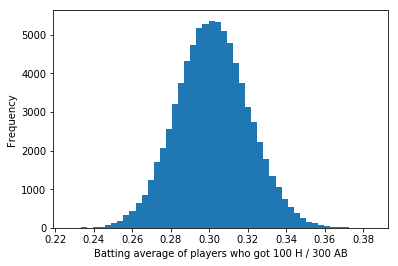

In [53]:
# density plots are annoyingly difficult in matplotlib
# if you want one, you should use seaborn's kdeplot
hit_100['true_average'].plot(kind='hist', bins=50)
plt.xlabel('Batting average of players who got 100 H / 300 AB')
plt.title('');

### Figure 2.5

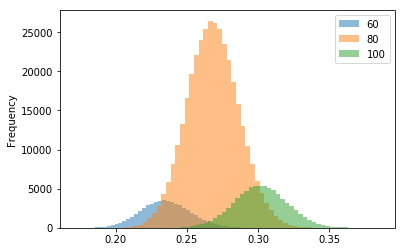

In [52]:
hits_filter = simulations['hits'].isin([60, 80, 100])

(simulations[hits_filter]
 .groupby('hits')['true_average']
 .plot(kind='hist', bins=50, alpha=.5, legend=True)
);
# note that we're not using density here